In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nike-sales-nti15/Nike Dataset.csv


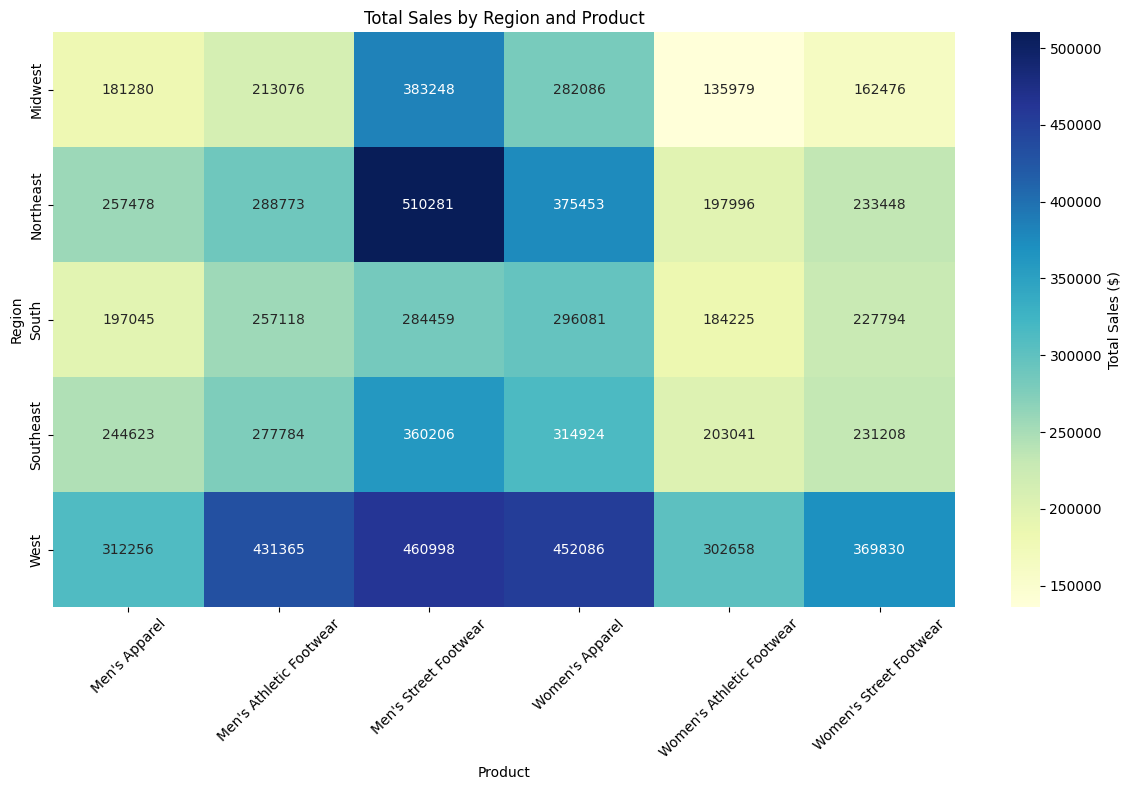

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/nike-sales-nti15/Nike Dataset.csv')

# Convert 'Invoice Date' to datetime with the correct format (make sure the format is appropriate)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y', errors='coerce')

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows where 'Total Sales' is NaN
df.dropna(subset=['Total Sales'], inplace=True)

# Group by 'Region' and 'Product', and calculate total sales
sales_by_region_product = df.groupby(['Region', 'Product']).agg(
    Total_Sales=('Total Sales', 'sum')
).reset_index()

# Create a pivot table for the heatmap
heatmap_data = sales_by_region_product.pivot(index="Region", columns="Product", values="Total_Sales")

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Total Sales ($)'})
plt.title('Total Sales by Region and Product')
plt.xlabel('Product')
plt.ylabel('Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

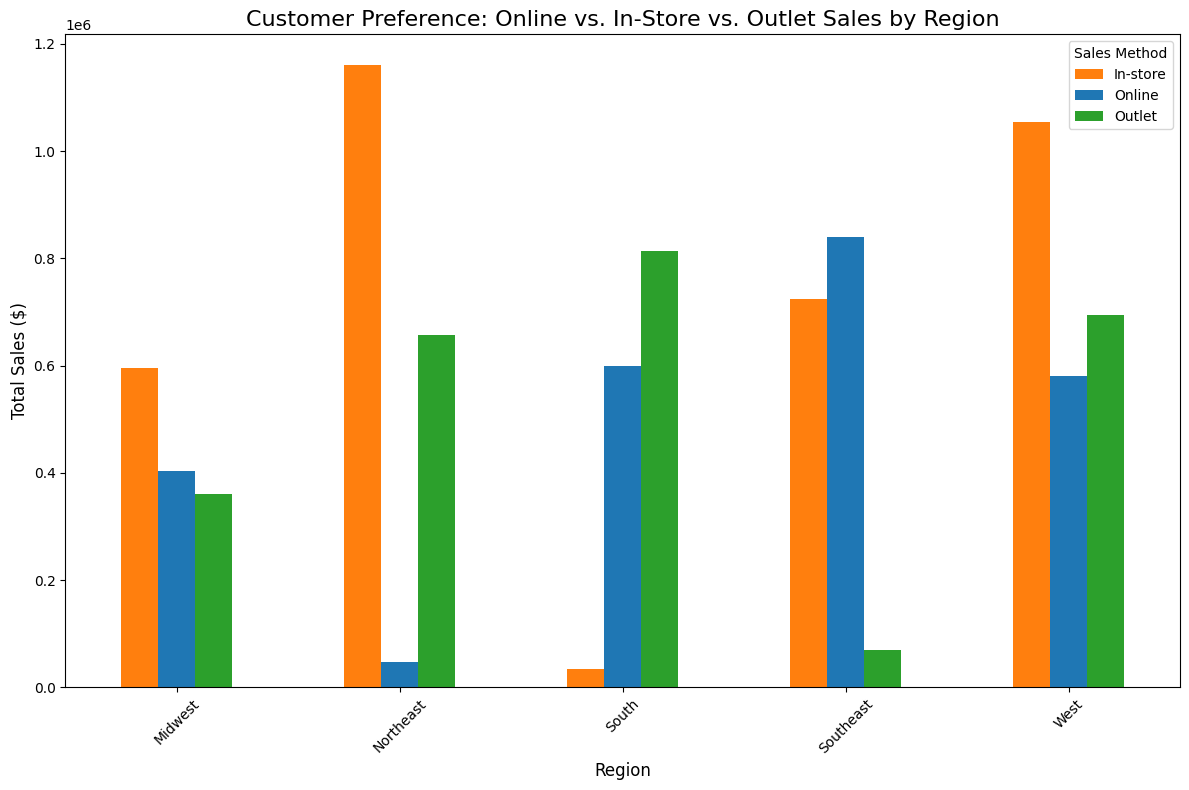

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/nike-sales-nti15/Nike Dataset.csv')

# Convert 'Invoice Date' to datetime with the correct format (make sure the format is appropriate)
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y', errors='coerce')

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows where 'Sales Method' or 'Total Sales' is NaN
df.dropna(subset=['Sales Method', 'Total Sales'], inplace=True)

# Group by 'Region', 'Sales Method', and 'Product', and calculate total sales
sales_by_method_region = df.groupby(['Region', 'Sales Method', 'Product']).agg(
    Total_Sales=('Total Sales', 'sum')
).reset_index()

# Pivot table for better visualization in bar chart (total sales by sales method per region)
pivot_data = sales_by_method_region.pivot_table(
    index='Region', columns='Sales Method', values='Total_Sales', aggfunc='sum'
)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Custom colors for Sales Methods: online, in-store, and outlet
colors = {'Online': '#1f77b4', 'In-store': '#ff7f0e', 'Outlet': '#2ca02c'}  # Different color for outlet

# Plot each sales method with respective color
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 8), color=[colors.get(c) for c in pivot_data.columns])

# Adding chart details
plt.title('Customer Preference: Online vs. In-Store vs. Outlet Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sales Method', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
#Table: Distribution of Sales Across Product Categories
# Grouping by Product and calculating total sales
category_sales = df.groupby('Product').agg(
    Total_Sales=('Total Sales', 'sum'),
    Units_Sold=('Units Sold', 'sum'),
    Average_Price=('Price per Unit', 'mean')  # You can calculate average price if needed
).reset_index()

# Display the table
print(category_sales)

# Optionally, you can save this table to a CSV file
category_sales.to_csv('product_category_sales_distribution.csv', index=False)


                     Product  Total_Sales  Units_Sold  Average_Price
0              Men's Apparel      1192682       30085      49.870513
1    Men's Athletic Footwear      1468116       42429      43.258333
2      Men's Street Footwear      1999192       57737      43.783333
3            Women's Apparel      1720630       42356      51.126923
4  Women's Athletic Footwear      1023899       31068      40.651282
5    Women's Street Footwear      1224756       38309      39.744872


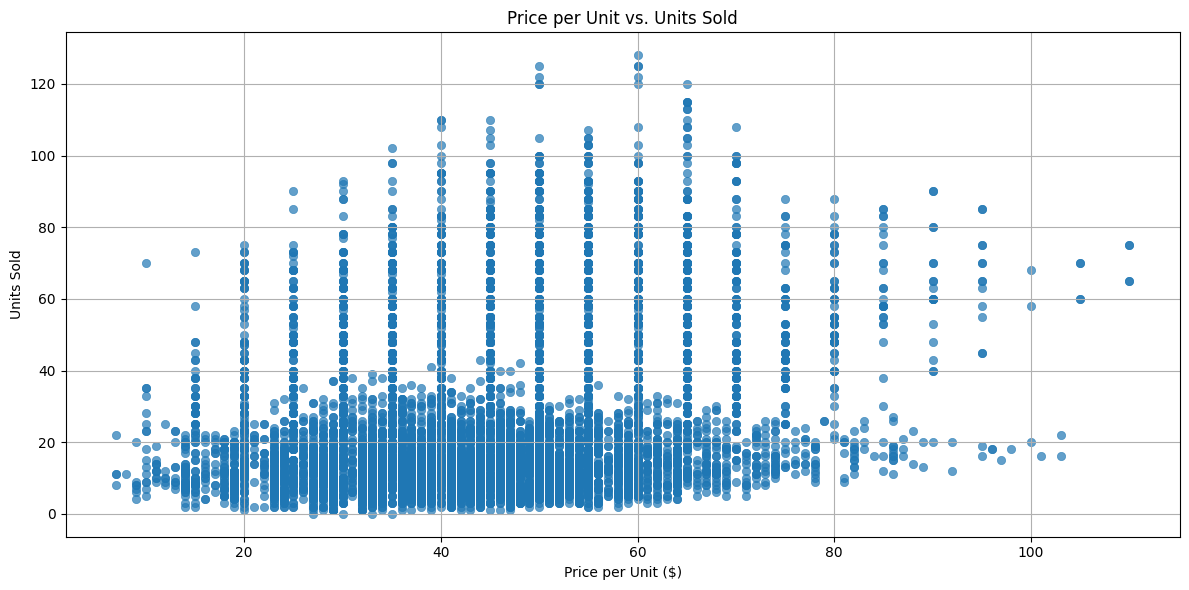

In [19]:
#Scatter Plot: Price per Unit vs. Units Sold

# Convert 'Invoice Date' to datetime with the correct format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y')

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows where 'Price per Unit' or 'Units Sold' is NaN
df.dropna(subset=['Price per Unit', 'Units Sold'], inplace=True)

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price per Unit', y='Units Sold', alpha=0.7, edgecolor=None)
plt.title('Price per Unit vs. Units Sold')
plt.xlabel('Price per Unit ($)')
plt.ylabel('Units Sold')
plt.grid()
plt.tight_layout()
plt.show()


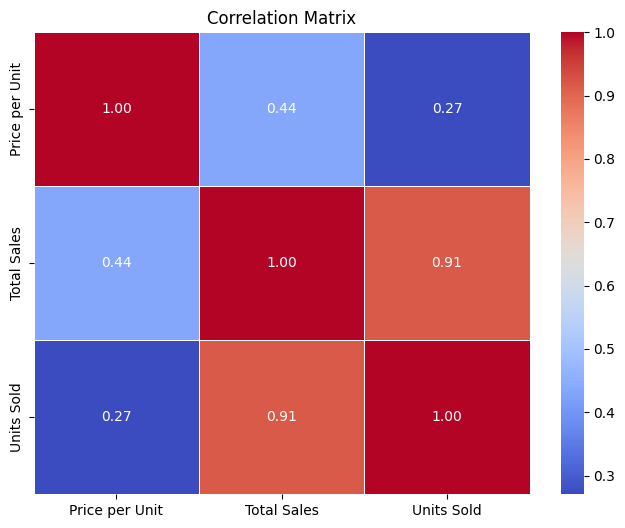

In [20]:
#Correlation Matrix

# Convert 'Invoice Date' to datetime with the correct format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y')

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Select relevant numerical columns for the correlation matrix
# Assuming these are the relevant columns; you can modify them as needed
numerical_cols = ['Price per Unit', 'Total Sales', 'Units Sold']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
